In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e2/train.csv")
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
test = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [4]:
test_1 = test.__deepcopy__()

In [5]:
test_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [6]:
train = train.drop(['id'], axis=1)
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [7]:
test = test.drop(['id'], axis=1)
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [8]:
train.gender.value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
train['gender']= label_encoder.fit_transform(train['gender'])
  
train['gender'].unique()

array([1, 0, 2])

In [10]:
test['gender']= label_encoder.fit_transform(test['gender'])
  
test['gender'].unique()

array([0, 1, 2])

In [11]:
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,1,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,0,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,0,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,1,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [12]:
train.ever_married.value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

In [13]:
train['ever_married']= label_encoder.fit_transform(train['ever_married'])
  
train['ever_married'].unique()

array([1, 0])

In [14]:
test['ever_married']= label_encoder.fit_transform(test['ever_married'])
  
test['ever_married'].unique()

array([1, 0])

In [15]:
train.work_type.value_counts()

Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

In [16]:
train['work_type']= label_encoder.fit_transform(train['work_type'])
  
train['work_type'].unique()

array([2, 3, 0, 4, 1])

In [17]:
test['work_type']= label_encoder.fit_transform(test['work_type'])
  
test['work_type'].unique()

array([2, 4, 0, 3, 1])

In [18]:
train.Residence_type.value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

In [19]:
train['Residence_type']= label_encoder.fit_transform(train['Residence_type'])
  
train['Residence_type'].unique()

array([1, 0])

In [20]:
test['Residence_type']= label_encoder.fit_transform(test['Residence_type'])
  
test['Residence_type'].unique()

array([0, 1])

In [21]:
train.smoking_status.value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [22]:
train['smoking_status']= label_encoder.fit_transform(train['smoking_status'])
  
train['smoking_status'].unique()

array([2, 1, 0, 3])

In [23]:
test['smoking_status']= label_encoder.fit_transform(test['smoking_status'])
  
test['smoking_status'].unique()

array([0, 3, 2, 1])

In [24]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,28.0,0,0,1,2,1,79.53,31.1,2,0
1,1,33.0,0,0,1,2,0,78.44,23.9,1,0
2,0,42.0,0,0,1,2,0,103.00,40.3,0,0
3,1,56.0,0,0,1,2,1,64.87,28.8,2,0
4,0,24.0,0,0,0,2,0,73.36,28.8,2,0


In [25]:
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,57.0,0,0,1,2,0,82.54,33.4,0
1,1,70.0,1,0,1,2,1,72.06,28.5,0
2,0,5.0,0,0,0,4,1,103.72,19.5,0
3,0,56.0,0,0,1,0,1,69.24,41.4,3
4,1,32.0,0,0,1,2,0,111.15,30.1,3


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
X = train.drop(['stroke'], axis=1)
y = train['stroke']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
from sklearn.linear_model import LogisticRegression
logit_cls = LogisticRegression(random_state = 0)
logit_cls.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [30]:
y_pred = logit_cls.predict_proba(X_test)[::,1]

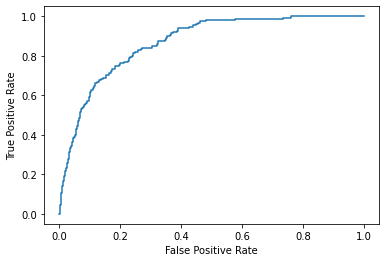

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

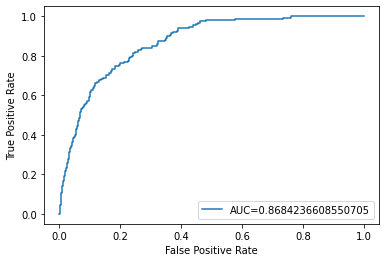

In [32]:
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [33]:
y_pred_test = logit_cls.predict_proba(test)[::,1]
y_pred_test

array([3.02210030e-02, 1.45920454e-01, 1.99854657e-04, ...,
       1.52624438e-04, 1.98445527e-03, 1.11546268e-04])

In [34]:
df_sub = pd.DataFrame(columns=["id","stroke"])
df_sub["id"] = test_1["id"]
df_sub["stroke"] = y_pred_test
df_sub.head()

,id,stroke
0,15304,0.030221
1,15305,0.145920
2,15306,0.000200
3,15307,0.047945
4,15308,0.002746


In [35]:
df_sub.to_csv("logistic.csv",index=False)